In [1]:
import pandas as pd 
import numpy as np

In [2]:
df0 = pd.read_csv('IMDB Dataset.csv')
df0 = df0.loc[:10000, :]

In [3]:
# taking only 10000 rows due to the counvectorizer is giving memory error, as the array formed is larger for my laptop RAM
df0

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative
9999,Smashing film about film-making. Shows the int...,positive


In [4]:
df0.duplicated().sum()

17

In [5]:
# there are 418 duplicate rows, drop them
df0.drop_duplicates(inplace=True, ignore_index=True)
df0.duplicated().sum()

0

In [6]:
# get stopwords from nltk
# As we are doing text classification , stopwords are of no use
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')
stopwords_eng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
# chat words removal
import json

with open('chat_words.json') as f:
    chat_words = json.load(f)

In [8]:
# punctuations removal
import string
punc = string.punctuation

In [9]:
# encompasing all preprocessing steps for the string in each row
import re
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

def preprocessing(text):
    text = re.sub(re.compile('<.*?> '),'',text)
    text = re.sub('[0-90-9]','',text)
    for char in punc:
        text = text.replace(char, '')
    text = text.lower()
    text = [ word for word in word_tokenize(text) if word.lower() not in stopwords_eng]
    text = [ chat_words[word.upper()].lower() if word.upper() in chat_words else word for word in text]
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    return ' '.join(text)

In [10]:
# creating new dataframe
df1 = df0.copy()

In [11]:
# label encoding the output column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['sentiment'] = le.fit_transform(df1['sentiment'])

In [12]:
df1

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
9979,Give me a break. How can anyone say that this ...,0
9980,This movie is a bad movie. But after watching ...,0
9981,This is a movie that was probably made to ente...,0
9982,Smashing film about film-making. Shows the int...,1


In [13]:
# applying preprosessing steps
df1['review'] = df1['review'].apply(preprocessing)
df1.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [46]:
# train test split for training and testing purpose
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['review'], df1['sentiment'],test_size=0.2)

In [65]:
# Applying Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000)

x_train_bow = cv.fit_transform(x_train).toarray()
x_test_bow = cv.transform(x_test).toarray()

In [66]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
# Applying Randomforest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_bow,y_train)

RandomForestClassifier()

accuracy_score 0.8307461191787682
precision_score 0.8301507537688442
recall_score 0.8301507537688442
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1002
           1       0.83      0.83      0.83       995

    accuracy                           0.83      1997
   macro avg       0.83      0.83      0.83      1997
weighted avg       0.83      0.83      0.83      1997



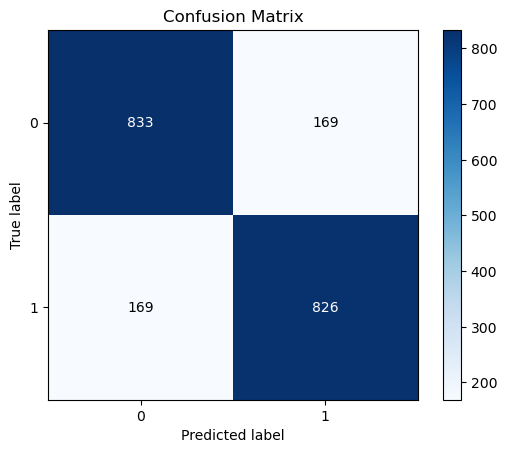

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

y_pred = rf.predict(x_test_bow)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

accuracy_score 0.7696544817225839
precision_score 0.810126582278481
recall_score 0.7047047047047047
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       998
           1       0.81      0.70      0.75       999

    accuracy                           0.77      1997
   macro avg       0.77      0.77      0.77      1997
weighted avg       0.77      0.77      0.77      1997



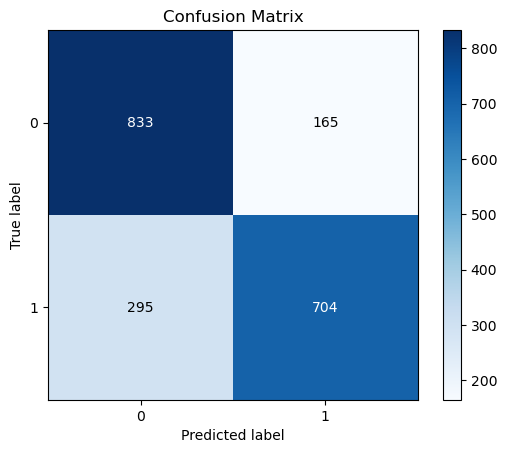

In [19]:
# Applying Naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train_bow,y_train)

y_pred = gnb.predict(x_test_bow)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

In [55]:
# Applying N grams

from sklearn.feature_extraction.text import CountVectorizer

cvn = CountVectorizer(ngram_range=(1,2), max_features=10000)

x_train_cvn = cvn.fit_transform(x_train).toarray()
x_test_cvn = cvn.transform(x_test).toarray()

accuracy_score 0.7951927891837757
precision_score 0.7903543307086615
recall_score 0.8038038038038038
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       998
           1       0.79      0.80      0.80       999

    accuracy                           0.80      1997
   macro avg       0.80      0.80      0.80      1997
weighted avg       0.80      0.80      0.80      1997



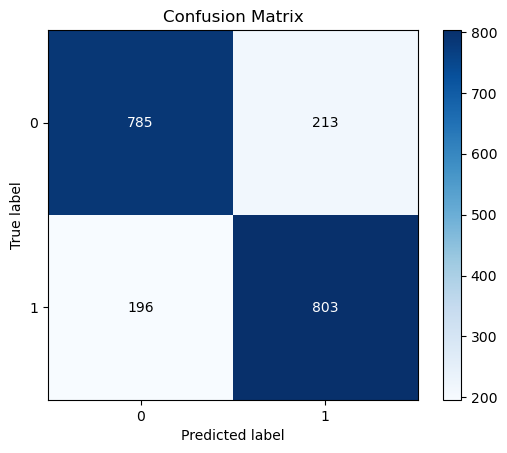

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train_cvn,y_train)

y_pred = gnb.predict(x_test_cvn)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

accuracy_score 0.8352528793189785
precision_score 0.8356854838709677
recall_score 0.8331658291457287
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1002
           1       0.84      0.83      0.83       995

    accuracy                           0.84      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.84      0.84      0.84      1997



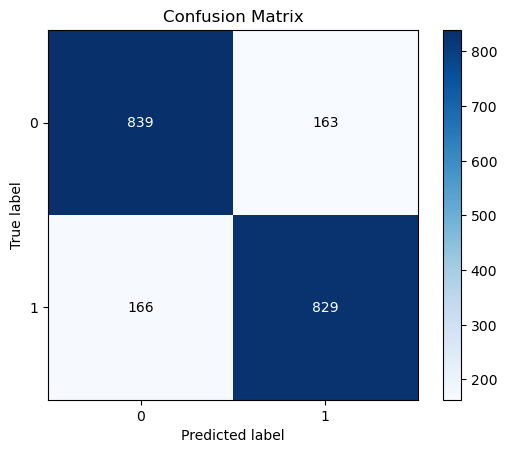

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_cvn,y_train)

y_pred = rf.predict(x_test_cvn)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

# Applying Tfidf Vectorizer

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [74]:
print(x_train_tfidf.shape)
print(x_test_tfidf.shape)
print(y_train.shape)
print(y_test.shape)

(7987, 3000)
(1997, 3000)
(7987,)
(1997,)


accuracy_score 0.8417626439659489
precision_score 0.8482051282051282
recall_score 0.8311557788944723
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1002
           1       0.85      0.83      0.84       995

    accuracy                           0.84      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.84      0.84      0.84      1997



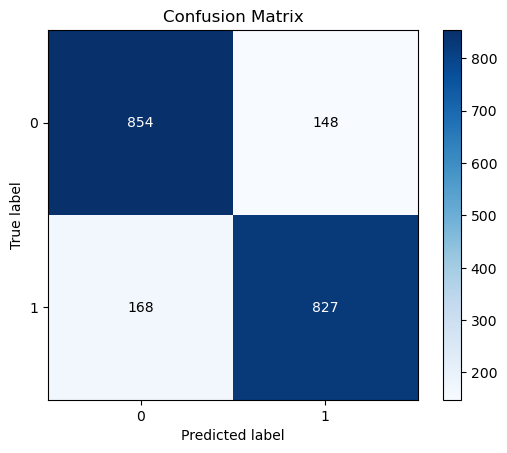

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

tfidf_rf = RandomForestClassifier()
tfidf_rf.fit(x_train_tfidf,y_train)

y_pred = tfidf_rf.predict(x_test_tfidf)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train_tfidf,y_train)

y_pred = gnb.predict(x_test_tfidf)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

# Using Word2vec to get vectors (Word embeddings)

In [26]:
df1

,review,sentiment
0,one review mention watch oz episod youll hook ...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
9979,give break anyon say good hockey movi know mov...,0
9980,movi bad movi watch endless seri bad horror mo...,0
9981,movi probabl made entertain middl school earli...,0
9982,smash film filmmak show intens strang relation...,1


In [27]:
import gensim
from gensim.models import word2vec
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [28]:
story = []
for doc in df1['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [29]:
len(story)

9984

In [30]:
model = gensim.models.Word2Vec(window = 10, min_count = 2)

In [31]:
model.build_vocab(story)

In [32]:
model.train(story, total_examples= model.corpus_count, epochs= model.epochs)

(5525509, 6049345)

In [33]:
len(model.wv.index_to_key)

25385

In [34]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

In [35]:
df1['review'].values[0]

'one review mention watch oz episod youll hook right exactli happen mebr br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordbr br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awaybr br would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may

In [36]:
model.wv['one']

array([-0.65355104,  0.26324704, -0.05370981,  0.0868314 , -0.4950354 ,
       -1.4287899 ,  1.0854274 ,  2.2746513 ,  0.3190879 , -0.40509084,
        1.0187715 , -0.49299288,  0.46511644, -0.27124184,  0.41080454,
        0.45595106,  1.3438078 , -0.24414465, -0.6649098 ,  0.35988387,
        1.0417898 ,  0.8955751 ,  0.03990455, -0.09030643, -0.633935  ,
        0.7336465 ,  0.7878787 ,  0.05819096, -0.27042195, -0.8048835 ,
        0.73171264, -0.71471703,  0.77187276, -0.6074156 , -0.04053694,
        1.0960636 ,  0.02354869, -0.14234234, -0.8934996 , -0.01210793,
        0.45456722, -0.16508387,  0.93161947, -0.5403139 ,  0.810918  ,
        0.31089896,  0.48922765, -0.28015614, -0.07464304, -0.9970937 ,
        0.28760278, -0.7052512 , -0.06521808, -0.8299808 ,  0.22818547,
       -0.52331287,  0.19714202,  0.10819746,  0.46467263, -0.3309032 ,
        0.06788371,  0.1314183 ,  1.4617263 , -0.70140976, -0.23766817,
        0.5779541 , -0.10697022,  1.9522369 , -0.64270884,  0.57

In [37]:
document_vector(df1['review'].values[0])

array([-0.28861526,  0.38743368, -0.02751499, -0.05798474, -0.02976507,
       -0.70905495,  0.1976473 ,  0.7964076 ,  0.04775695, -0.28526735,
       -0.22072113, -0.6022781 , -0.04832664,  0.2717064 , -0.14540341,
       -0.20459272,  0.19214141, -0.35195342, -0.1110572 , -0.61194533,
        0.18471034,  0.3543512 ,  0.14532512, -0.1733951 , -0.04506396,
        0.14289719, -0.2593842 , -0.29086983, -0.4330342 , -0.01896889,
        0.28805187, -0.01481952,  0.03478274, -0.27258363, -0.08783706,
        0.36338237, -0.1682083 , -0.03584162, -0.13876082, -0.4744886 ,
       -0.06718471, -0.20173906, -0.2426769 , -0.23331824,  0.3431432 ,
       -0.3584015 , -0.10745918, -0.0738924 ,  0.26205474,  0.255516  ,
        0.18411955, -0.14750299,  0.10544869, -0.09228039, -0.2320077 ,
        0.07897767,  0.19298446, -0.17551595, -0.13289383, -0.02451058,
        0.25832912, -0.01097928, -0.11578778,  0.05123612, -0.47716513,
        0.36537293, -0.0715527 ,  0.15381874, -0.4234651 ,  0.28

In [38]:
from tqdm import tqdm
X = []
for doc in tqdm(df1['review'].values):
    X.append(document_vector(doc))

  0%|          | 7/9984 [00:00<02:49, 58.81it/s]

100%|██████████| 9984/9984 [01:42<00:00, 97.88it/s] 


In [39]:
X = np.array(X)

In [40]:
X.shape

(9984, 100)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df1['sentiment'])

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

accuracy_score 0.8082123184777166
precision_score 0.792156862745098
recall_score 0.8253319713993871
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1018
           1       0.79      0.83      0.81       979

    accuracy                           0.81      1997
   macro avg       0.81      0.81      0.81      1997
weighted avg       0.81      0.81      0.81      1997



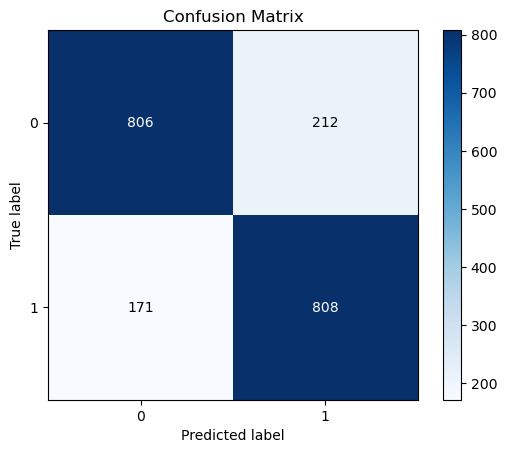

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

accuracy_score 0.7491236855282924
precision_score 0.7375745526838966
recall_score 0.7579162410623085
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1018
           1       0.74      0.76      0.75       979

    accuracy                           0.75      1997
   macro avg       0.75      0.75      0.75      1997
weighted avg       0.75      0.75      0.75      1997



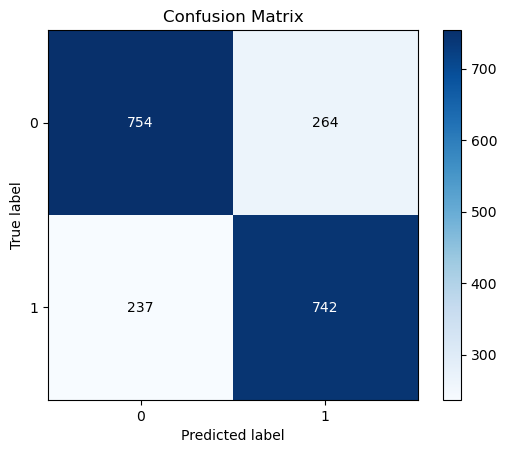

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

## Hyper Parameter Tuning

In [78]:
# Tfidf is giving better scores, lets hyper parameter tune that
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
hyper_parameters = { 'n_estimators' :[80, 100, 120],
                    'criterion' :['gini', 'entropy'],
                    'max_depth' : [4,6,8,10],
                    'min_samples_split' : [1,2,3]}

gcv = GridSearchCV(tfidf_rf,param_grid=hyper_parameters,cv=5,scoring='accuracy' )
gcv.fit(x_train_tfidf,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\Anaconda3\lib\site-pack

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [80, 100, 120]},
             scoring='accuracy')

In [81]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 120}

accuracy_score 0.8222333500250375
precision_score 0.7914389799635702
recall_score 0.8733668341708543
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1002
           1       0.79      0.87      0.83       995

    accuracy                           0.82      1997
   macro avg       0.83      0.82      0.82      1997
weighted avg       0.83      0.82      0.82      1997



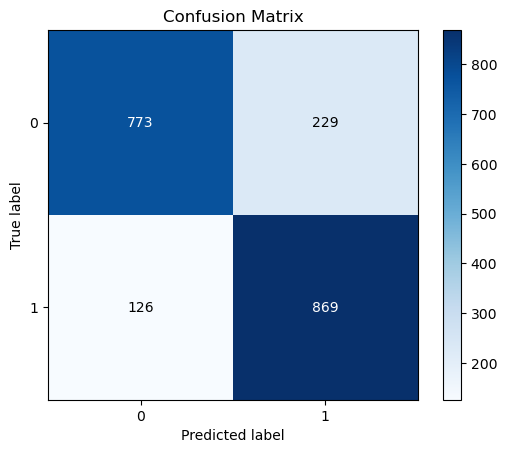

In [82]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

tfidf_rf = RandomForestClassifier(max_depth=10,criterion='gini',min_samples_split=2,n_estimators=120)
tfidf_rf.fit(x_train_tfidf,y_train)

y_pred = tfidf_rf.predict(x_test_tfidf)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

accuracy_score 0.8322483725588382
precision_score 0.8367346938775511
recall_score 0.8241206030150754
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1002
           1       0.84      0.82      0.83       995

    accuracy                           0.83      1997
   macro avg       0.83      0.83      0.83      1997
weighted avg       0.83      0.83      0.83      1997



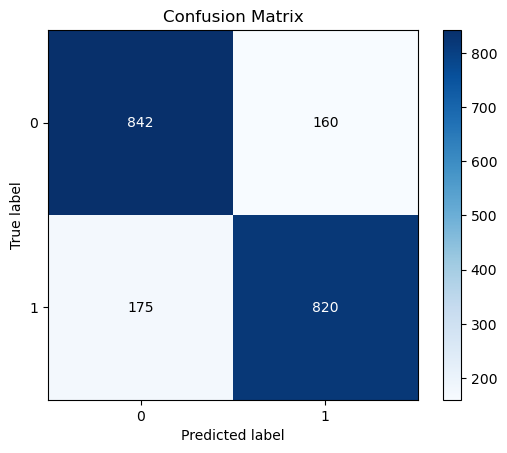

In [83]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

tfidf_rf = RandomForestClassifier()
tfidf_rf.fit(x_train_tfidf,y_train)

y_pred = tfidf_rf.predict(x_test_tfidf)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

In [79]:
import pickle
with open('tfidf.pkl', 'wb')as f :
    pickle.dump(tfidf,f)

In [84]:
import pickle
with open('tfidf_rf.pkl', 'wb')as f :
    pickle.dump(tfidf_rf,f)